# Relatório de Análise VII


## Criando Agrupamentos

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('aluguel_residencial.csv', sep= ';')

In [4]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
6,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0,17.59,Apartamento
7,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,Apartamento
8,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.27,Apartamento
9,Apartamento,Olaria,3,1,0,68,1000.0,670.0,0.0,14.71,Apartamento


In [5]:
dados['Valor'].mean()

3465.402299430185

In [7]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados =dados[selecao]

In [9]:
dados['Bairro'].drop_duplicates()

5           Copacabana
7      Barra da Tijuca
8               Tijuca
11             Ipanema
14            Botafogo
17              Leblon
105           Flamengo
Name: Bairro, dtype: object

In [10]:
grupo_bairro = dados.groupby('Bairro')


In [11]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [12]:
grupo_bairro.groups 

{'Barra da Tijuca': [7, 13, 19, 21, 24, 31, 44, 47, 51, 56, 60, 70, 81, 84, 86, 89, 98, 100, 114, 116, 118, 124, 130, 139, 142, 161, 167, 168, 177, 180, 182, 186, 207, 209, 220, 222, 227, 233, 254, 267, 273, 275, 281, 285, 290, 292, 300, 325, 326, 327, 328, 331, 339, 349, 350, 351, 359, 365, 373, 379, 381, 411, 412, 413, 418, 421, 423, 424, 446, 449, 451, 456, 469, 483, 486, 498, 500, 507, 528, 530, 532, 534, 542, 544, 547, 550, 560, 566, 584, 591, 593, 594, 596, 600, 601, 606, 608, 614, 615, 625, ...], 'Botafogo': [14, 35, 66, 67, 85, 91, 96, 102, 147, 151, 169, 269, 313, 314, 377, 399, 401, 416, 454, 496, 523, 548, 582, 589, 637, 664, 706, 766, 797, 826, 833, 849, 853, 861, 871, 890, 915, 918, 929, 947, 974, 985, 993, 1003, 1028, 1053, 1077, 1082, 1107, 1153, 1164, 1208, 1247, 1266, 1275, 1299, 1331, 1332, 1365, 1387, 1395, 1397, 1478, 1487, 1507, 1521, 1528, 1535, 1570, 1600, 1603, 1613, 1615, 1616, 1618, 1625, 1665, 1677, 1688, 1706, 1741, 1745, 1783, 1829, 1849, 1857, 1871, 1885, 

## Estatística Descritivas

In [13]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3383.0,5500.50,5123.02,800.0,2400.0,3700.0,6700.0,32000.0
Botafogo,849.0,3375.46,2015.90,700.0,2200.0,3000.0,4250.0,22000.0
Copacabana,2445.0,3351.52,1904.58,100.0,1915.0,2900.0,4200.0,9900.0
Flamengo,654.0,3220.12,1958.30,800.0,1800.0,2700.0,4000.0,9500.0
Ipanema,1227.0,5451.55,2093.76,1200.0,3759.0,5500.0,7000.0,9900.0
Leblon,890.0,5661.45,2746.71,100.0,3900.0,5000.0,7000.0,30000.0
Tijuca,1097.0,1999.94,1039.67,750.0,1500.0,1800.0,2300.0,19000.0


In [14]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns= {'min': 'Mínimo','max': 'Máximo',})

,Mínimo,Máximo,sum
Bairro,,,
Barra da Tijuca,800.0,32000.0,18608184.0
Botafogo,700.0,22000.0,2865766.0
Copacabana,100.0,9900.0,8194465.0
Flamengo,800.0,9500.0,2105958.0
Ipanema,1200.0,9900.0,6689051.0
Leblon,100.0,30000.0,5038694.0
Tijuca,750.0,19000.0,2193932.0


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

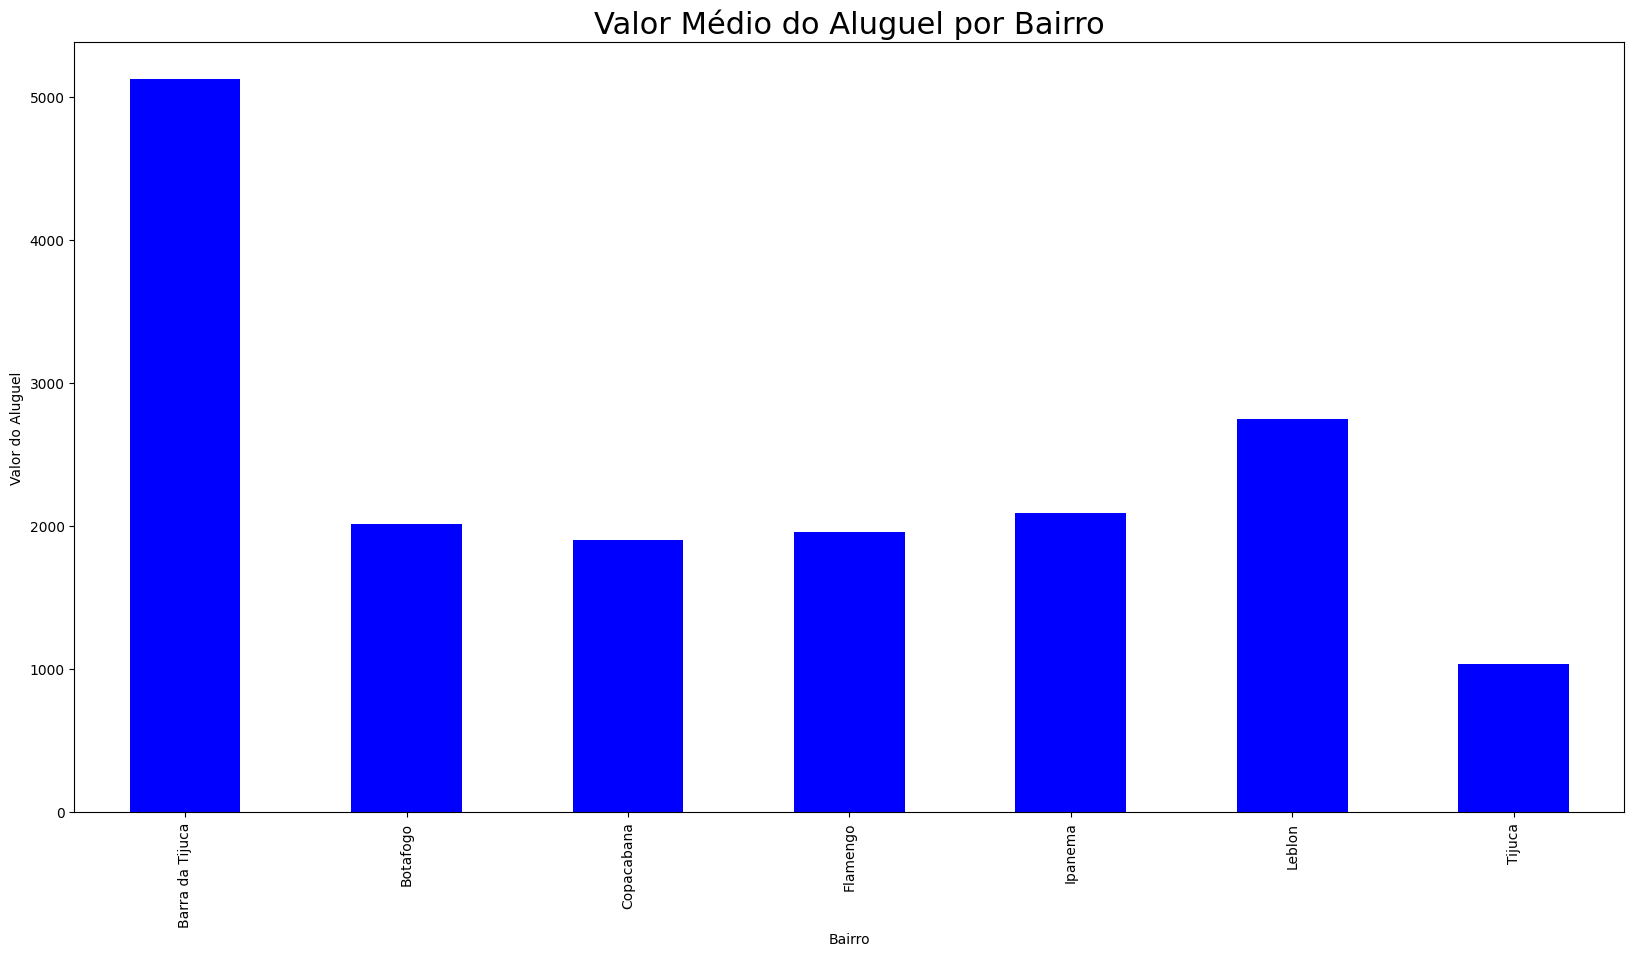

In [20]:
fig = grupo_bairro['Valor'].std().plot.bar(color= 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize':22})